## Homework 11

First Load the Data files

In [1]:
import numpy as np

In [2]:
# Load Data File 1
tmp_list = []
with open('xray1of4.txt', 'r') as file:
    for row in file:
        tmp_list.append(row.split('\t'))
xray1of4 = np.array(tmp_list).astype('float')
xray1of4

array([[0.3229, 0.5084, 0.2875, ..., 0.146 , 0.474 , 0.    ],
       [0.414 , 0.5371, 0.4078, ..., 0.061 , 0.714 , 0.    ],
       [0.3913, 0.4426, 0.3863, ..., 0.583 , 0.    , 0.    ],
       ...,
       [0.6517, 0.3555, 0.7353, ..., 0.6909, 0.    , 1.    ],
       [0.6264, 0.3622, 0.6301, ..., 0.7239, 0.    , 1.    ],
       [0.5525, 0.314 , 0.8267, ..., 0.7313, 0.    , 1.    ]])

In [3]:
# Load Data File 2
tmp_list = []
with open('xray2of4.txt', 'r') as file:
    for row in file:
        tmp_list.append(row.split('\t'))
xray2of4 = np.array(tmp_list).astype('float')
xray2of4.shape

(200, 7)

In [4]:
# Load Data File 3
tmp_list = []
with open('xray3of4.txt', 'r') as file:
    for row in file:
        tmp_list.append(row.split('\t'))
xray3of4 = np.array(tmp_list).astype('float')
xray3of4.shape

(200, 7)

In [5]:
# Load Data file 4
tmp_list = []
with open('xray4of4.txt', 'r') as file:
    for row in file:
        tmp_list.append(row.split('\t'))
xray4of4 = np.array(tmp_list).astype('float')
xray4of4.shape

(200, 7)

Create the four  training/testing datasets.

In [6]:
fdim = 6 # feature dimension. 
n_samples = xray1of4.shape[0]
# Features: 
p1 = xray1of4[:,0:fdim]
p2 = xray2of4[:,0:fdim]
p3 = xray3of4[:,0:fdim]
p4 = xray4of4[:,0:fdim]
#Labels: 0 and 1 need to be converted to +1 and -1
t1 = (2*xray1of4[:,-1]-1)
t2 = (2*xray2of4[:,-1]-1)
t3 = (2*xray3of4[:,-1]-1)
t4 = (2*xray4of4[:,-1]-1)

#Group into cross validation sets
R1 = np.concatenate((p2,p3,p4),axis=0)
R2 = np.concatenate((p3,p4,p1),axis=0)
R3 = np.concatenate((p4,p1,p2),axis=0)
R4 = np.concatenate((p1,p2,p3),axis=0)

# Cross Validation Labels
y1 = np.concatenate((t2,t3,t4),axis=0)
y2 = np.concatenate((t3,t4,t1),axis=0)
y3 = np.concatenate((t4,t1,t2),axis=0)
y4 = np.concatenate((t1,t2,t3),axis=0)

sen = 0 #Sensitivity
spe = 0 #Specificity

Complete the remaining code to

train a libsvm model ```model1``` using p1 to predict pt1 and compare against t1, and compute Cmat1

train a libsvm model ```model2``` using p2 to predict pt2 and compare against t2, and compute Cmat2

train a libsvm model ```model3``` using p3 to predict pt3 and compare against t3, and compute Cmat3

train a libsvm model ```model4``` using p4 to predict pt4 and compare against t4, and compute Cmat4

Then the overall cross validation confusion matrix Cmat = Cmat1 + Cmat2 + Cmat3 + Cmat4

Evaluate sensitivity and specificity from Cmat


In [7]:
from sklearn import svm

## Model 1

In [8]:
model1 = svm.SVC(kernel='rbf',C=0.25)
model1.fit(R1,y1)

SVC(C=0.25)

In [9]:
i0 = model1.support_          # indices of support vectors
nsv = model1.n_support_       # number of support vectors in class 0 and class 1
sv = model1.support_vectors_  # Support Vectors
f = model1.dual_coef_        # this is the vector f = alpha.*d


print("Number of Support Vectors for each class: " + str(nsv))
print("Chosen Support Vectors: \n" + str(sv))
print("Index of chosen Support Vectors: " + str(i0))
print("Labels of Support Vectors: " + str(y1[i0]))
print("f: " + str(f))

Number of Support Vectors for each class: [72 79]
Chosen Support Vectors: 
[[0.3336 0.3474 0.334  0.4275 0.0329 0.4269]
 [0.3397 0.4193 0.3243 0.4658 0.0827 0.5375]
 [0.3898 0.4155 0.3843 0.4759 0.0306 0.7439]
 [0.3162 0.4843 0.2774 0.518  0.     0.2632]
 [0.4067 0.3865 0.4229 0.4543 0.0637 0.5357]
 [0.3088 0.4426 0.282  0.5037 0.1243 0.4344]
 [0.3476 0.4425 0.3477 0.4424 0.0605 0.5726]
 [0.2666 0.3497 0.2355 0.4003 0.0561 0.1708]
 [0.38   0.4684 0.3815 0.4684 0.05   0.7733]
 [0.2714 0.3533 0.2511 0.4008 0.046  0.5837]
 [0.3947 0.3956 0.4002 0.4328 0.0909 0.694 ]
 [0.2542 0.352  0.2424 0.3747 0.0353 0.3258]
 [0.2863 0.3439 0.2735 0.3512 0.0495 0.3175]
 [0.3903 0.8654 0.2434 0.5795 0.     0.2866]
 [0.4089 0.5559 0.3669 0.6313 0.1363 0.7762]
 [0.4257 0.7263 0.4172 0.7415 0.0403 1.    ]
 [0.4861 0.7023 0.4788 0.7122 0.3829 0.9854]
 [0.2079 0.2906 0.2456 0.4509 0.0516 0.4173]
 [0.2919 0.3959 0.2823 0.4136 0.522  0.0652]
 [0.391  0.5633 0.3668 0.5996 0.7568 0.0341]
 [0.4054 0.4852 0.4013 0.

In [10]:
## Compute hyper-plane parameters
w = np.dot(sv.T, f.T)   # Note we need to transpose f as it is stored as a row vector not a column vector
b = model1.intercept_

print("w: \n" + str(w))
print("b: " + str(b))

w: 
[[ 1.66693319]
 [-0.47306215]
 [ 1.49641274]
 [-1.13677498]
 [ 1.14092192]
 [-0.1967823 ]]
b: [0.22873189]


In [11]:
yhat = model1.predict(R1)

#Compute Accuracy
Acc = 1- np.sum(np.abs(yhat - y1))/R1.shape[0]
print("Accuracy: " + str(100*Acc) + "%")

Accuracy: 92.0%


In [12]:
yt1 = model1.predict(p1)

Confusion matrix:
[[98.  6.]
 [ 2. 94.]]


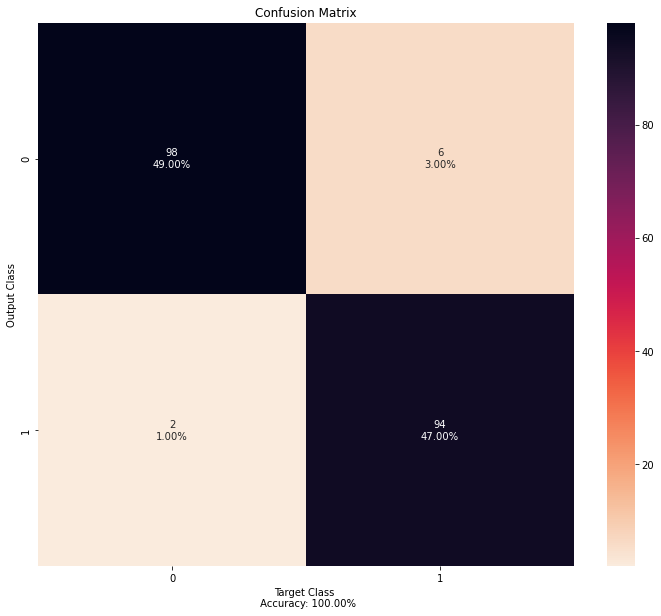

In [15]:
import seaborn as sn
import matplotlib.pyplot as plt
#plot confusion matrix
c_mat1 = np.zeros((2,2))
for i in range(p1.shape[0]):
    c_mat1[int((yt1[i]+1)/2), int((t1[i]+1)/2)] += 1

print("Confusion matrix:\n" + str(c_mat1))

group_counts = ["{0:0.0f}".format(value) for value in c_mat1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in c_mat1.flatten()/np.sum(c_mat1)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(c_mat1.shape[0], c_mat1.shape[1])

accuracy = (np.sum(np.logical_and(yt1, t1))/ t1.shape[0]) * 100

plt.figure(figsize=(12,10))
sn.heatmap(c_mat1, annot=labels, fmt='', cmap='rocket_r')
plt.title("Confusion Matrix")
plt.ylabel('Output Class')
_ = plt.xlabel('Target Class \n Accuracy: ' + '%.2f'%accuracy + "%")

## Model 2

In [16]:
model2 = svm.SVC(kernel='rbf',C=0.25)
model2.fit(R2,y2)

SVC(C=0.25)

In [17]:
i0 = model2.support_          # indices of support vectors
nsv = model2.n_support_       # number of support vectors in class 0 and class 1
sv = model2.support_vectors_  # Support Vectors
f = model2.dual_coef_        # this is the vector f = alpha.*d


print("Number of Support Vectors for each class: " + str(nsv))
print("Chosen Support Vectors: \n" + str(sv))
print("Index of chosen Support Vectors: " + str(i0))
print("Labels of Support Vectors: " + str(y1[i0]))
print("f: " + str(f))

Number of Support Vectors for each class: [72 72]
Chosen Support Vectors: 
[[0.4252 0.5837 0.4003 0.6695 0.8451 0.0761]
 [0.2919 0.3959 0.2823 0.4136 0.522  0.0652]
 [0.391  0.5633 0.3668 0.5996 0.7568 0.0341]
 [0.4054 0.4852 0.4013 0.5035 0.6355 0.0979]
 [0.3685 0.5117 0.3573 0.5654 0.7136 0.0387]
 [0.3942 0.5477 0.3793 0.5836 0.7365 0.05  ]
 [0.3764 0.5465 0.3459 0.5885 0.7428 0.039 ]
 [0.3769 0.5347 0.3511 0.5895 0.744  0.1395]
 [0.3844 0.583  0.3766 0.5959 0.7522 0.0761]
 [0.4149 0.5043 0.4154 0.5083 0.6416 0.5223]
 [0.3503 0.459  0.3177 0.5168 0.6523 0.    ]
 [0.3872 0.5538 0.3795 0.5658 0.7142 0.0277]
 [0.3621 0.4433 0.3656 0.4699 0.593  0.0582]
 [0.3767 0.4548 0.3704 0.4969 0.6271 0.0609]
 [0.3641 0.531  0.3445 0.5592 0.7058 0.0327]
 [0.3804 0.5263 0.361  0.5839 0.7369 0.0573]
 [0.4031 0.4691 0.3922 0.4796 0.6053 0.    ]
 [0.3658 0.496  0.3551 0.5223 0.6593 0.1756]
 [0.3065 0.4322 0.3017 0.5117 0.6458 0.0553]
 [0.3402 0.503  0.3414 0.5026 0.6344 0.0465]
 [0.5372 0.624  0.5278 0.

In [18]:
## Compute hyper-plane parameters
w = np.dot(sv.T, f.T)   # Note we need to transpose f as it is stored as a row vector not a column vector
b = model2.intercept_

print("w: \n" + str(w))
print("b: " + str(b))

w: 
[[ 1.39486729]
 [-0.741521  ]
 [ 1.44231459]
 [-1.25415678]
 [ 1.24747038]
 [-0.15952854]]
b: [0.26678328]


In [19]:
yhat = model2.predict(R2)

#Compute Accuracy
Acc = 1- np.sum(np.abs(yhat - y2))/R2.shape[0]
print("Accuracy: " + str(100*Acc) + "%")

Accuracy: 92.33333333333333%


In [20]:
yt2 = model1.predict(p2)

Confusion matrix:
[[100.   7.]
 [  0.  93.]]


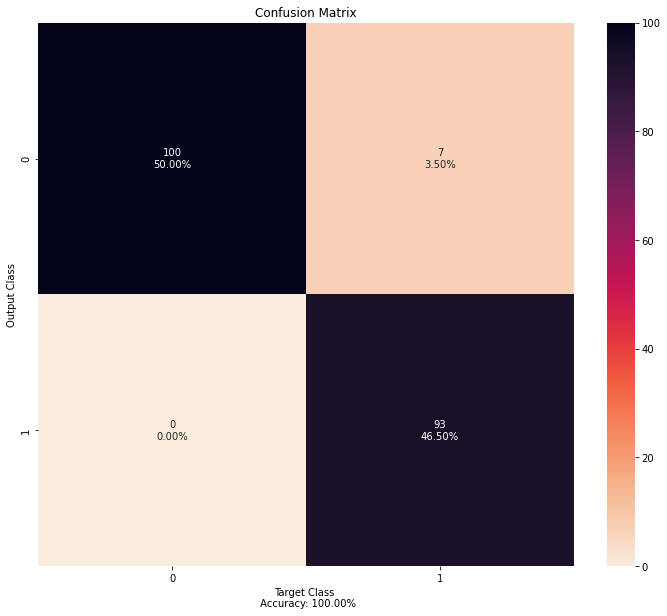

In [21]:
c_mat2 = np.zeros((2,2))
for i in range(p2.shape[0]):
    c_mat2[int((yt2[i]+1)/2), int((t2[i]+1)/2)] += 1

print("Confusion matrix:\n" + str(c_mat2))

group_counts = ["{0:0.0f}".format(value) for value in c_mat2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in c_mat2.flatten()/np.sum(c_mat2)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(c_mat2.shape[0], c_mat2.shape[1])

accuracy = (np.sum(np.logical_and(yt2, t2))/ t2.shape[0]) * 100

plt.figure(figsize=(12,10))
sn.heatmap(c_mat2, annot=labels, fmt='', cmap='rocket_r')
plt.title("Confusion Matrix")
plt.ylabel('Output Class')
_ = plt.xlabel('Target Class \n Accuracy: ' + '%.2f'%accuracy + "%")

## Model 3

In [22]:
model3 = svm.SVC(kernel='rbf',C=0.25)
model3.fit(R3,y3)

SVC(C=0.25)

In [23]:
i0 = model3.support_          # indices of support vectors
nsv = model3.n_support_       # number of support vectors in class 0 and class 1
sv = model3.support_vectors_  # Support Vectors
f = model3.dual_coef_        # this is the vector f = alpha.*d


print("Number of Support Vectors for each class: " + str(nsv))
print("Chosen Support Vectors: \n" + str(sv))
print("Index of chosen Support Vectors: " + str(i0))
print("Labels of Support Vectors: " + str(y1[i0]))
print("f: " + str(f))

Number of Support Vectors for each class: [41 38]
Chosen Support Vectors: 
[[0.4471 0.7371 0.4371 0.7478 0.0188 0.9594]
 [0.6545 0.6811 0.6545 0.681  0.1435 0.9607]
 [0.4974 0.7816 0.455  0.8337 0.1332 0.634 ]
 [0.4635 0.7403 0.4693 0.7403 0.0277 0.9725]
 [0.6159 0.6102 0.616  0.6102 0.0846 0.8725]
 [0.5342 0.5282 0.5158 0.5784 0.0571 0.2374]
 [0.4928 0.5525 0.5272 0.5703 0.0656 0.3876]
 [0.6404 0.5183 0.6571 0.5851 0.1956 0.4354]
 [0.6118 0.4965 0.6315 0.5504 0.0693 0.4159]
 [0.5859 0.6536 0.5859 0.6536 0.0303 1.    ]
 [0.6404 0.5395 0.6493 0.5374 0.0822 0.6957]
 [0.6189 0.5892 0.6019 0.6481 0.171  0.5123]
 [0.6766 0.6336 0.6766 0.6336 0.1212 0.8426]
 [0.6151 0.603  0.6152 0.5974 0.     0.7082]
 [0.3913 0.4426 0.3863 0.4475 0.583  0.    ]
 [0.4631 0.4476 0.4631 0.4477 0.0727 0.6955]
 [0.2877 0.4636 0.249  0.5541 0.     0.2227]
 [0.4054 0.4256 0.4054 0.4256 0.0237 0.6829]
 [0.4331 0.416  0.4329 0.4164 0.1169 0.5477]
 [1.1318 1.277  0.2961 0.4989 0.     0.5881]
 [0.2581 0.5574 0.2952 0.

In [24]:
## Compute hyper-plane parameters
w = np.dot(sv.T, f.T)   # Note we need to transpose f as it is stored as a row vector not a column vector
b = model3.intercept_

print("w: \n" + str(w))
print("b: " + str(b))

w: 
[[ 0.66058183]
 [-0.69576381]
 [ 0.85943303]
 [-0.68270666]
 [ 1.58962555]
 [-1.92333306]]
b: [0.10221351]


In [25]:
yhat = model3.predict(R3)

#Compute Accuracy
Acc = 1- np.sum(np.abs(yhat - y3))/R3.shape[0]
print("Accuracy: " + str(100*Acc) + "%")

Accuracy: 94.0%


In [26]:
yt3 = model1.predict(p3)

Confusion matrix:
[[94.  1.]
 [ 6. 99.]]


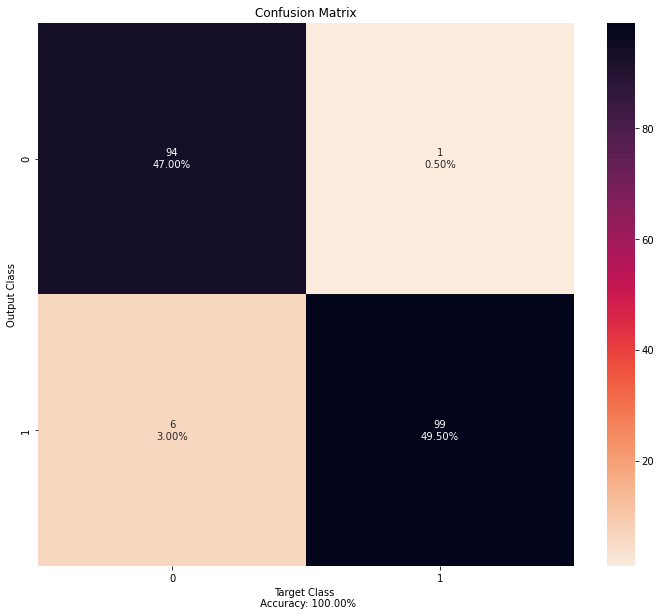

In [27]:
c_mat3 = np.zeros((2,2))
for i in range(p3.shape[0]):
    c_mat3[int((yt3[i]+1)/2), int((t3[i]+1)/2)] += 1

print("Confusion matrix:\n" + str(c_mat3))

group_counts = ["{0:0.0f}".format(value) for value in c_mat3.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in c_mat3.flatten()/np.sum(c_mat3)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(c_mat3.shape[0], c_mat3.shape[1])

accuracy = (np.sum(np.logical_and(yt3, t3))/ t3.shape[0]) * 100

plt.figure(figsize=(12,10))
sn.heatmap(c_mat3, annot=labels, fmt='', cmap='rocket_r')
plt.title("Confusion Matrix")
plt.ylabel('Output Class')
_ = plt.xlabel('Target Class \n Accuracy: ' + '%.2f'%accuracy + "%")

## Model 4

In [28]:
model4 = svm.SVC(kernel='rbf',C=0.25)
model4.fit(R4,y4)

SVC(C=0.25)

In [29]:
i0 = model4.support_          # indices of support vectors
nsv = model4.n_support_       # number of support vectors in class 0 and class 1
sv = model4.support_vectors_  # Support Vectors
f = model4.dual_coef_        # this is the vector f = alpha.*d


print("Number of Support Vectors for each class: " + str(nsv))
print("Chosen Support Vectors: \n" + str(sv))
print("Index of chosen Support Vectors: " + str(i0))
print("Labels of Support Vectors: " + str(y1[i0]))
print("f: " + str(f))

Number of Support Vectors for each class: [66 70]
Chosen Support Vectors: 
[[0.3913 0.4426 0.3863 0.4475 0.583  0.    ]
 [0.3824 0.4569 0.3823 0.4701 0.0993 0.5625]
 [0.4919 0.6829 0.4967 0.688  0.0985 0.9726]
 [0.5112 0.669  0.501  0.6738 0.0962 0.9704]
 [0.4631 0.4476 0.4631 0.4477 0.0727 0.6955]
 [0.404  0.4786 0.4016 0.4757 0.0616 0.6878]
 [0.4054 0.4256 0.4054 0.4256 0.0237 0.6829]
 [0.4331 0.416  0.4329 0.4164 0.1169 0.5477]
 [0.3026 0.3818 0.2935 0.4007 0.0689 0.5324]
 [1.1318 1.277  0.2961 0.4989 0.     0.5881]
 [0.3966 0.506  0.3888 0.557  0.1461 0.6374]
 [0.5687 0.6627 0.5687 0.6627 0.     0.9363]
 [0.5374 0.6671 0.5375 0.6671 0.0686 0.7465]
 [0.2581 0.5574 0.2952 0.6844 0.     0.066 ]
 [0.5004 0.5938 0.5013 0.5926 0.1082 0.7239]
 [0.498  0.5916 0.495  0.6011 0.0983 0.6672]
 [0.5646 0.6059 0.5646 0.6059 0.0695 0.9321]
 [0.4636 0.7206 0.4586 0.7304 0.0801 1.    ]
 [0.3336 0.3474 0.334  0.4275 0.0329 0.4269]
 [0.3898 0.4155 0.3843 0.4759 0.0306 0.7439]
 [0.4067 0.3865 0.4229 0.

In [30]:
## Compute hyper-plane parameters
w = np.dot(sv.T, f.T)   # Note we need to transpose f as it is stored as a row vector not a column vector
b = model4.intercept_

print("w: \n" + str(w))
print("b: " + str(b))

w: 
[[ 1.57681271]
 [-0.70994686]
 [ 1.55213379]
 [-1.28540658]
 [ 1.2612016 ]
 [-0.17439474]]
b: [0.17208446]


In [31]:
yhat = model4.predict(R4)

#Compute Accuracy
Acc = 1- np.sum(np.abs(yhat - y4))/R4.shape[0]
print("Accuracy: " + str(100*Acc) + "%")

Accuracy: 93.33333333333333%


In [32]:
yt4 = model1.predict(p4)

Confusion matrix:
[[99.  9.]
 [ 1. 91.]]


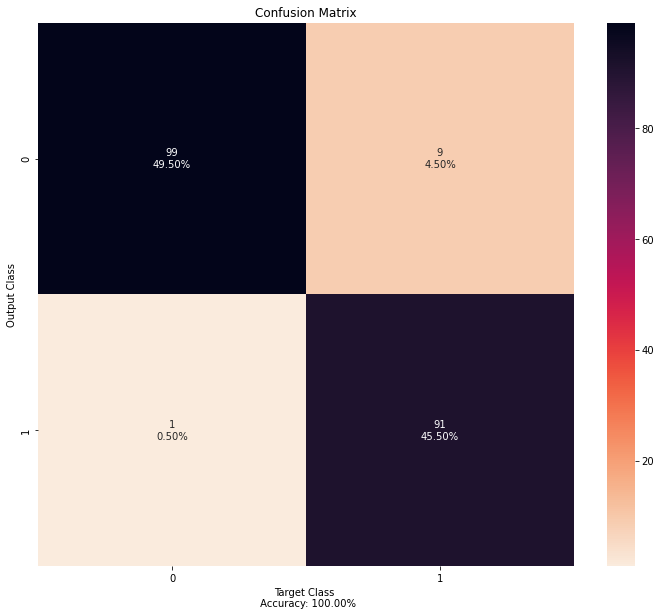

In [33]:
c_mat4 = np.zeros((2,2))
for i in range(p4.shape[0]):
    c_mat4[int((yt4[i]+1)/2), int((t4[i]+1)/2)] += 1

print("Confusion matrix:\n" + str(c_mat4))

group_counts = ["{0:0.0f}".format(value) for value in c_mat4.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in c_mat4.flatten()/np.sum(c_mat4)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(c_mat4.shape[0], c_mat4.shape[1])

accuracy = (np.sum(np.logical_and(yt4, t4))/ t4.shape[0]) * 100

plt.figure(figsize=(12,10))
sn.heatmap(c_mat4, annot=labels, fmt='', cmap='rocket_r')
plt.title("Confusion Matrix")
plt.ylabel('Output Class')
_ = plt.xlabel('Target Class \n Accuracy: ' + '%.2f'%accuracy + "%")

In [34]:
c_mat = c_mat1 + c_mat2 + c_mat3 +c_mat4
print("Combined confusion matrix:\n" + str(c_mat))

Combined confusion matrix:
[[391.  23.]
 [  9. 377.]]


Text(87.0, 0.5, 'Output Class')

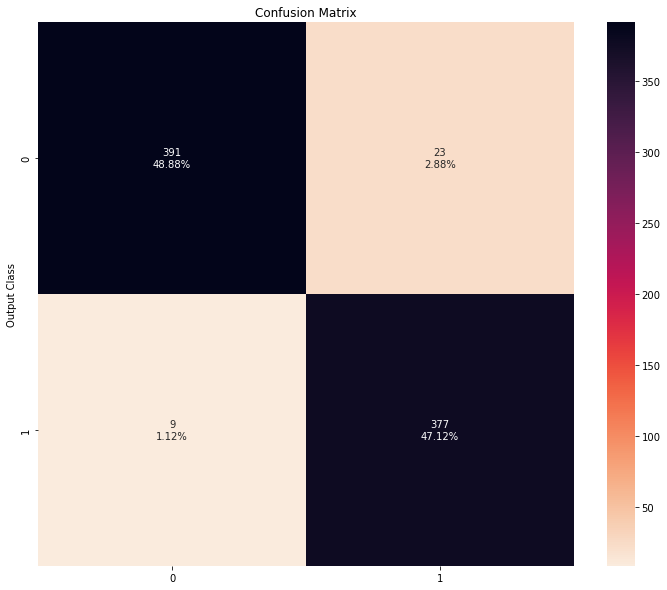

In [35]:
group_counts = ["{0:0.0f}".format(value) for value in c_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in c_mat.flatten()/np.sum(c_mat)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(c_mat.shape[0], c_mat.shape[1])

plt.figure(figsize=(12,10))
sn.heatmap(c_mat, annot=labels, fmt='', cmap='rocket_r')
plt.title("Confusion Matrix")
plt.ylabel('Output Class')

In [36]:
sen = c_mat[0,0]/(c_mat[0,0] + c_mat[0,1]) #Sensitivity
spe = c_mat[1,1]/(c_mat[1,0] + c_mat[1,1]) #Specificity
print("Sensitivity is: " + str(100 * sen) + "%")
print("Specificity is: " + str(100 * spe) + "%")

Sensitivity is: 94.44444444444444%
Specificity is: 97.66839378238342%
